In [58]:
import pandas as pd
import seaborn as sns
import os
import plotly as px
import matplotlib.pyplot as plt

In [59]:
# import csv
df = pd.read_csv('../../data/external/Uber_lyft/cab_rides.csv')
df


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [60]:
df.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [61]:
print(pd.unique(df['cab_type']))
print(pd.unique(df['product_id']))
print(pd.unique(df['name']))


['Lyft' 'Uber']
['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']


In [62]:
# convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['time_stamp'], unit='ms')
# round to nearest second
df['time_stamp'] = df['datetime'].dt.round('s')
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime
0,0.44,Lyft,2018-12-16 09:30:08,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890
1,0.44,Lyft,2018-11-27 02:00:24,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677
2,0.44,Lyft,2018-11-28 01:00:22,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.198
3,0.44,Lyft,2018-11-30 04:53:03,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749
4,0.44,Lyft,2018-11-29 03:49:20,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223
...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,2018-12-01 23:53:06,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-12-01 23:53:05.534
693067,1.00,Uber,2018-12-01 23:53:06,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-01 23:53:05.534
693068,1.00,Uber,2018-12-01 23:53:06,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,2018-12-01 23:53:05.534
693069,1.00,Uber,2018-12-01 23:53:06,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-12-01 23:53:05.534


In [63]:
df = df[df.datetime < "2018-12-05"]

In [64]:
# get average price at 15 minute intervals
df_1_hour = df.groupby([pd.Grouper(key='datetime', freq='1h')])['price', 'surge_multiplier'].mean().reset_index()
df_1_hour

/var/folders/d_/jfh2jycd58x4hv_4s4yy9lhc0000gn/T/ipykernel_75594/2791593119.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1_hour = df.groupby([pd.Grouper(key='datetime', freq='1h')])['price', 'surge_multiplier'].mean().reset_index()


,datetime,price,surge_multiplier
0,2018-11-26 03:00:00,18.694805,1.029762
1,2018-11-26 04:00:00,16.537179,1.013095
2,2018-11-26 05:00:00,16.482955,1.015997
3,2018-11-26 06:00:00,16.525992,1.016917
4,2018-11-26 07:00:00,16.249730,1.008185
...,...,...,...
191,2018-12-04 02:00:00,16.958647,1.015224
192,2018-12-04 03:00:00,16.528455,1.010417
193,2018-12-04 04:00:00,17.059471,1.017191
194,2018-12-04 05:00:00,16.352306,1.010951


(array([17861., 17862., 17863., 17864., 17865., 17866., 17867., 17868.,
        17869.]),
 [Text(17861.0, 0, '2018-11-26'),
  Text(17862.0, 0, '2018-11-27'),
  Text(17863.0, 0, '2018-11-28'),
  Text(17864.0, 0, '2018-11-29'),
  Text(17865.0, 0, '2018-11-30'),
  Text(17866.0, 0, '2018-12-01'),
  Text(17867.0, 0, '2018-12-02'),
  Text(17868.0, 0, '2018-12-03'),
  Text(17869.0, 0, '2018-12-04')])

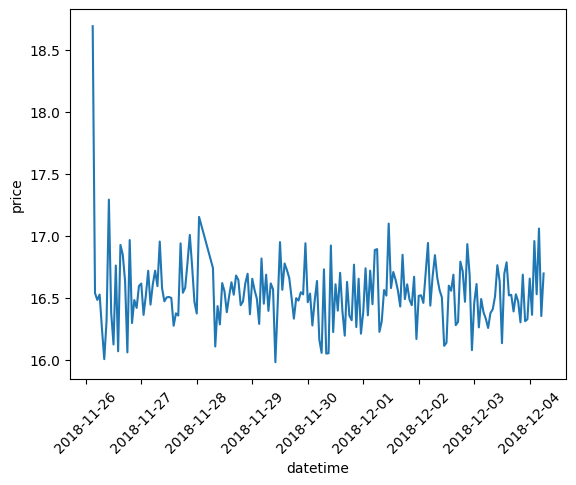

In [65]:
sns.lineplot(data=df_1_hour, x="datetime", y="price")
# rotate x axis
plt.xticks(rotation=45)

(array([17861., 17862., 17863., 17864., 17865., 17866., 17867., 17868.,
        17869.]),
 [Text(17861.0, 0, '2018-11-26'),
  Text(17862.0, 0, '2018-11-27'),
  Text(17863.0, 0, '2018-11-28'),
  Text(17864.0, 0, '2018-11-29'),
  Text(17865.0, 0, '2018-11-30'),
  Text(17866.0, 0, '2018-12-01'),
  Text(17867.0, 0, '2018-12-02'),
  Text(17868.0, 0, '2018-12-03'),
  Text(17869.0, 0, '2018-12-04')])

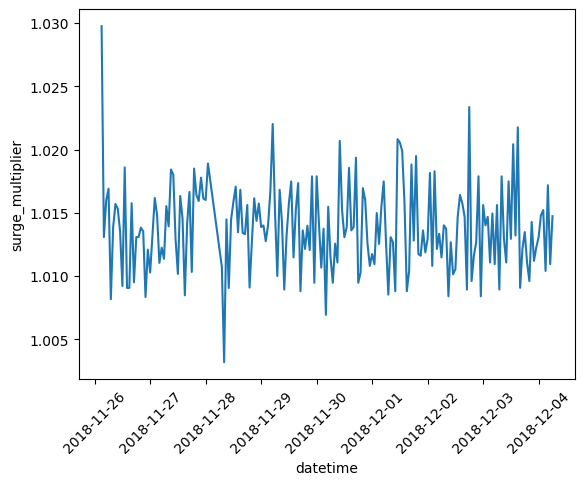

In [66]:
sns.lineplot(data=df_1_hour, x="datetime", y="surge_multiplier")
# rotate x axis
plt.xticks(rotation=45)

/var/folders/d_/jfh2jycd58x4hv_4s4yy9lhc0000gn/T/ipykernel_75594/813446140.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1_day = df.groupby([pd.Grouper(key='datetime', freq='1h'), 'cab_type'])['price', 'surge_multiplier'].mean().reset_index()


(array([17861., 17862., 17863., 17864., 17865., 17866., 17867., 17868.,
        17869.]),
 [Text(17861.0, 0, '2018-11-26'),
  Text(17862.0, 0, '2018-11-27'),
  Text(17863.0, 0, '2018-11-28'),
  Text(17864.0, 0, '2018-11-29'),
  Text(17865.0, 0, '2018-11-30'),
  Text(17866.0, 0, '2018-12-01'),
  Text(17867.0, 0, '2018-12-02'),
  Text(17868.0, 0, '2018-12-03'),
  Text(17869.0, 0, '2018-12-04')])

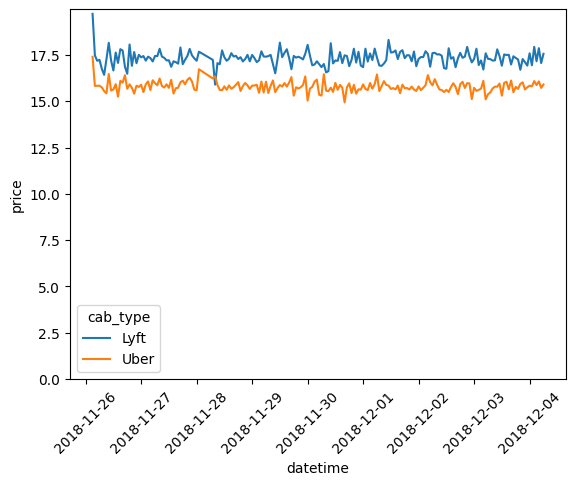

In [67]:
# average price by cab type over day
df_1_day = df.groupby([pd.Grouper(key='datetime', freq='1h'), 'cab_type'])['price', 'surge_multiplier'].mean().reset_index()
sns.lineplot(df_1_day, x="datetime", y="price", hue="cab_type")
plt.ylim(0)
plt.xticks(rotation=45)

In [68]:
# 